# 2022.09.23 실습

## Assignment 1 Solution

In [4]:
import pandas as pd
from db_conn import * # 교수님이 정의한 디비 연결 파일

def prob1():
    xl_file = 'score.xlsx'
    df = pd.read_excel(xl_file)
    print(df)
    
    res = df.loc[(df['midterm'] >= 20) & (df['final'] >= 20), ['sno', 'midterm', 'final']]
    final_res = res.sort_values(by='midterm', ascending=False)
    print(res)
    
    # 행과 열을 지정해서 데이터를 읽어내는 방법 1 : by label -> loc 이용
    print(df.loc[0, 'midterm'])
    print(df.loc[0:2, ['midterm', 'final']])
    
    # 행과 열을 지정해서 데이터를 읽어내는 방법 2 : by index -> iloc 이용
    print(df.iloc[0,4])
    print(df.iloc[0:2, [4, 5]])
    
def prob2():
    conn, cur = open_db()
    
    drop_sql = """drop table if exists score;"""
    cur.execute(drop_sql)
    conn.commit()
    
    create_sql = """
        create table score(
            sno int primary key,
            attendance float,
            homework float,
            discussion int,
            midterm float,
            final float,
            score float,
            grade char(1)
        );
    """
    cur.execute(create_sql)
    conn.commit()
    
    xl_file = 'score.xlsx'
    score = pd.read_excel(xl_file)
    
    rows = []
    for t in score.values:
        rows.append(tuple(t))
        
    insert_sql = """
        insert into score(sno, attendance, homework, discussion, midterm, final, score, grade)
            values (%s, %s, %s, %s, %s, %s, %s, %s)
    """
    cur.executemany(insert_sql, rows)
    conn.commit()
    
    close_db(conn, cur)
    
def prob3():
    conn, cur = open_db()
    
    select_sql = """
        select sno, midterm, final
        from score
        where midterm >= 20 and final >= 20
        order by midterm desc;
    """
    cur.execute(sql)
    
    r = cur.fetchone()
    
    while r:
        print("%d %.2f %.2f" % r['sno'], r['midterm'], r['final'])
        r = cur.fetchone()
        
    close_db(conn, cur)
    

if __name__=='__main__':
    prob1()
    #prob2()
    #prob3()

    sno  attendance  homework  discussion  midterm  final  score grade
0     1        7.73     19.37           0    35.00  30.10  92.20     A
1     2        7.73     20.00           0    34.12  30.10  91.95     A
2     3        7.73     19.37           0    34.30  29.75  91.15     A
3     4        8.00     18.12           2    31.50  29.05  88.67     A
4     5        8.00     20.00           2    33.25  21.35  84.60     A
..  ...         ...       ...         ...      ...    ...    ...   ...
87   88        8.00     20.00           0     9.62   2.80  40.42     F
88   89        8.00     19.37           0     6.12   4.55  38.04     F
89   90        7.73     18.75           0     3.50   0.00  29.98     F
90   91        7.20      0.00           0     3.50   1.05  11.75     F
91   92        5.60      5.00           0     0.00   0.00  10.60     F

[92 rows x 8 columns]
    sno  midterm  final
0     1    35.00  30.10
1     2    34.12  30.10
2     3    34.30  29.75
3     4    31.50  29.05
4    

## Assignment 2 Solution

mean= {'midterm': 23.56097826086956, 'final': 14.148369565217392, 'score': 64.04413043478262}
median= {'midterm': 24.5, 'final': 13.65, 'score': 67.58500000000001}
0    A
1    B
2    C
3    D
Name: grade, dtype: object
std= {'midterm': 7.937138059209427, 'final': 7.782639355286108, 'score': 15.208330362743974}
var= {'midterm': 62.99816057095079, 'final': 60.569475334448164, 'score': 231.29331242236026}
[ 0.    12.32  17.5   21.051 23.03  24.5   26.25  28.609 30.31  33.075
 35.   ]


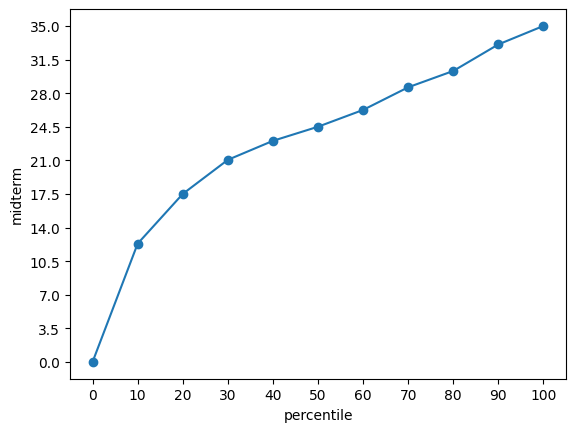

[ 0.     2.8    7.42  10.255 11.9   13.65  15.96  18.9   20.58  23.03
 32.2  ]


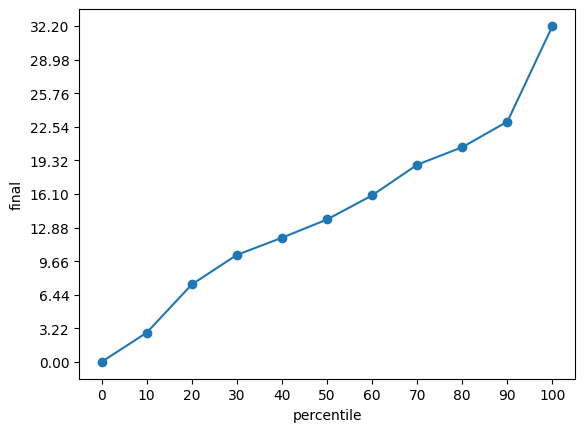

[10.6   45.831 52.226 59.048 62.076 67.585 69.622 73.67  76.3   78.461
 92.2  ]


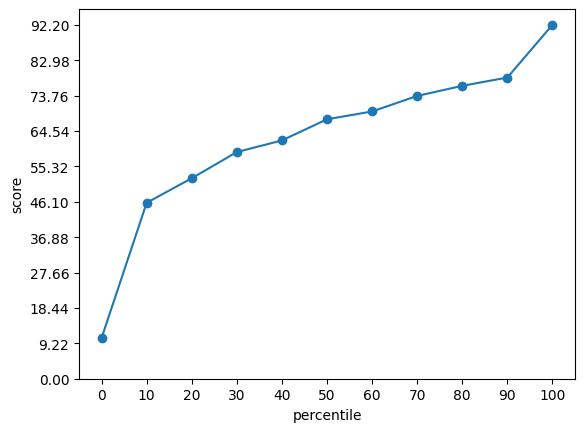

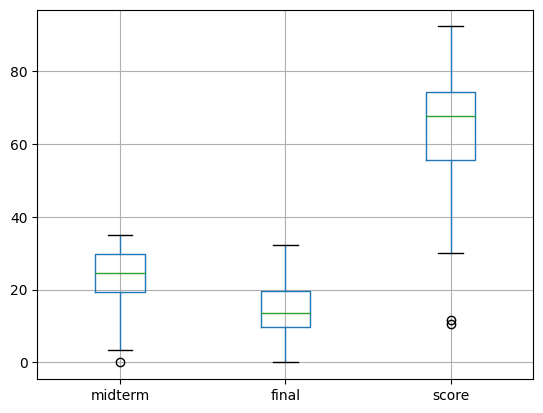

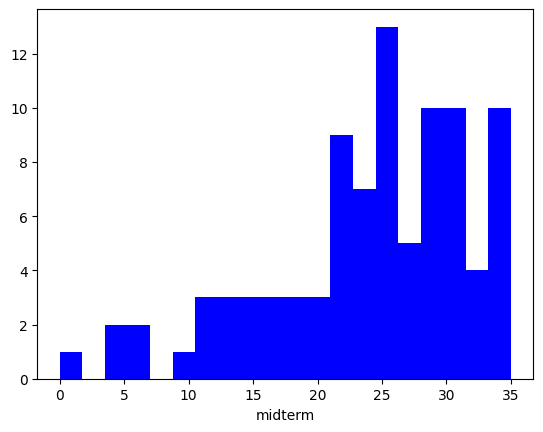

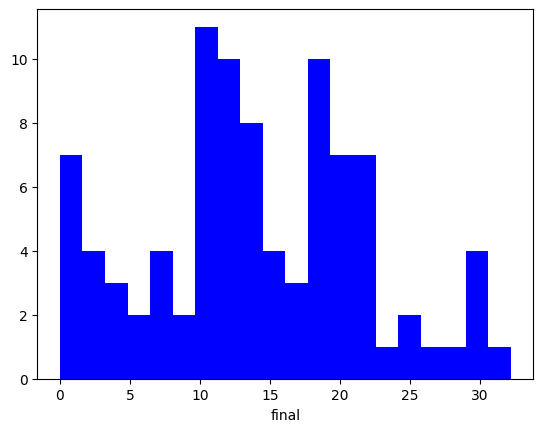

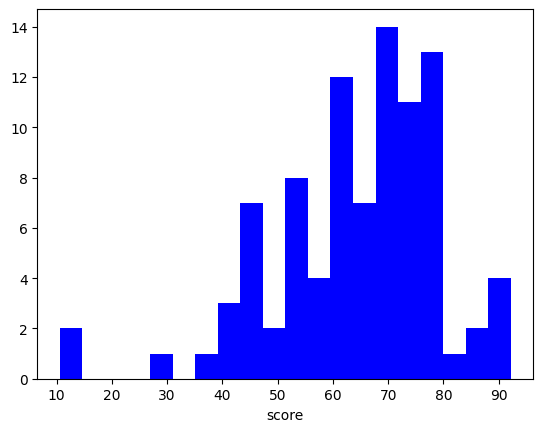

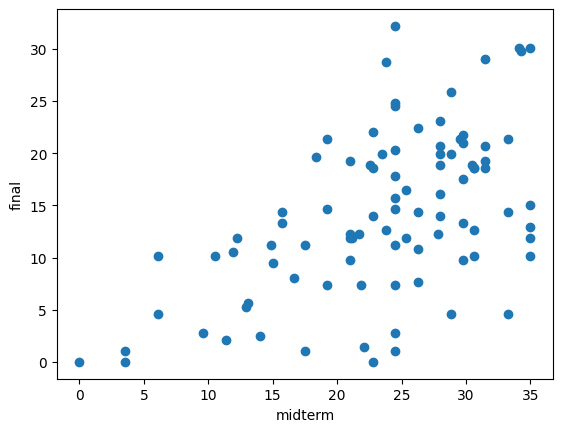

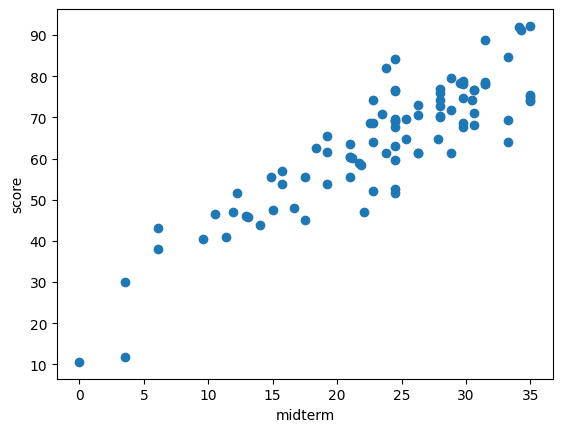

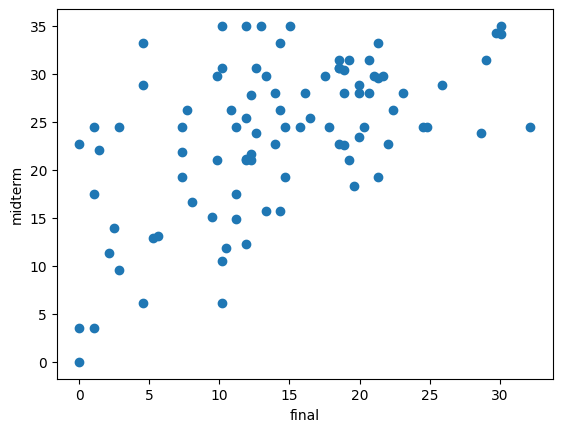

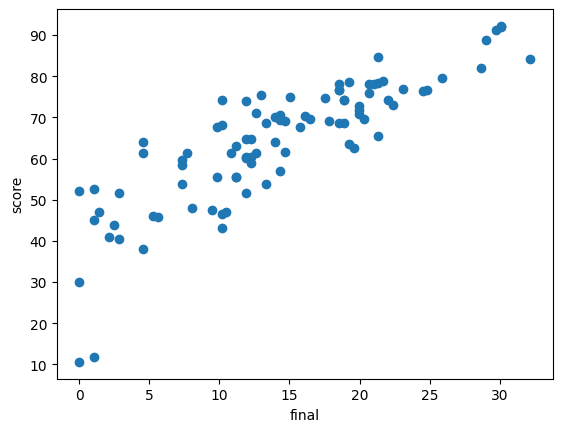

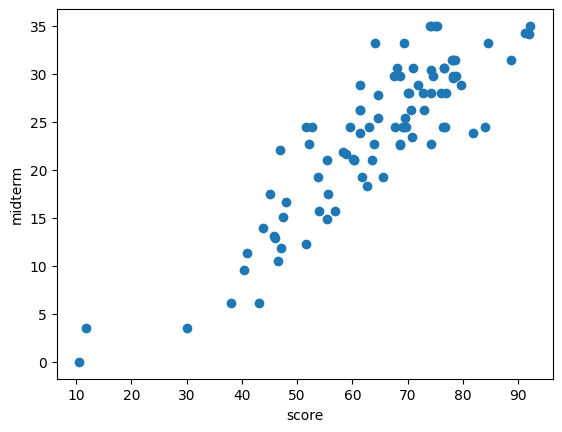

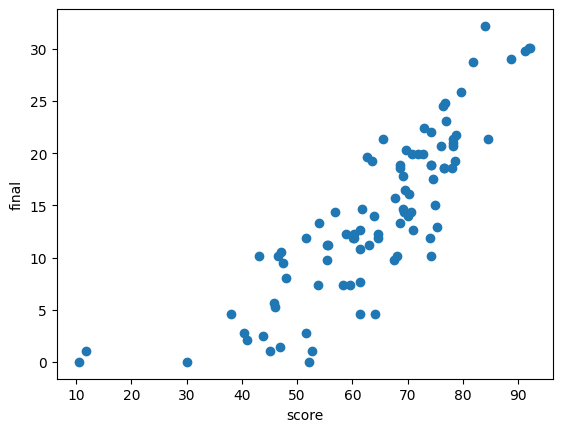

In [3]:
import pandas as pd

def prob1(df):
    mean = {}
    median = {}
    
    for col in ['midterm', 'final', 'score']:
        mean[col] = df[col].mean()
        median[col] = df[col].median()
        
    print('mean=', mean)
    print('median=', median)
    
def prob2(df):
    mode = df['grade'].mode()
    print(mode)
    
def prob3(df):
    std = {}
    var = {}
    
    for col in ['midterm', 'final', 'score']:
        std[col] = df[col].std()
        var[col] = df[col].var()
    
    print('std=', std)
    print('var=', var)

import matplotlib.pyplot as plt
import numpy as np

def prob4(df):
    p = [x for x in range(0, 101, 10)]
    
    for col in ['midterm', 'final', 'score']:
        percentile = np.percentile(df[col], p)
        print(percentile)
        
        plt.plot(p, percentile, 'o-')
        plt.xlabel('percentile')
        plt.ylabel(col)
        plt.xticks(p)
        plt.yticks(np.arange(0, max(percentile) + 1, max(percentile) / 10.0))
        plt.show()
        
def prob5(df):
    boxplot = df[['midterm', 'final', 'score']].boxplot()
    plt.show()

def prob6(df):
    for col in ['midterm', 'final', 'score']:
        plt.hist(df[col], facecolor='blue', bins=20) # bins: if 0~100 까지 있을 때, 그것을 20개로 나눈다.
        plt.xlabel(col)
        plt.show()
        
def prob7(df):
    for col1 in ['midterm', 'final', 'score']:
        for col2 in ['midterm', 'final', 'score']:
            if col1 == col2:
                continue
            
            plt.scatter(df[col1], df[col2])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()
            
def prob7_2(df):
    import seaborn as sns
    sns.pairplot(df[['midterm', 'final', 'score']])
    
if __name__ == '__main__':
    xl_file = 'score.xlsx'
    df = pd.read_excel(xl_file)
    
    prob1(df)
    prob2(df)
    prob3(df)
    prob4(df)
    prob5(df)
    prob6(df)
    prob7(df)
    prob7_2(df)

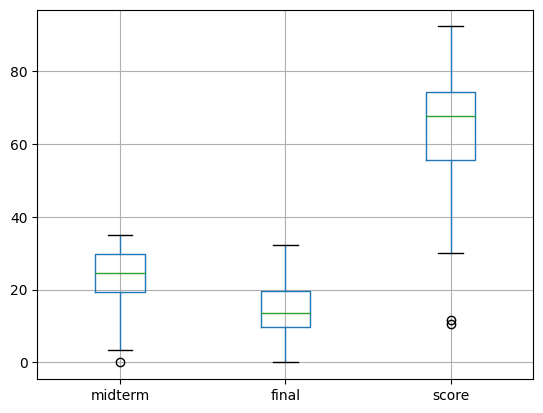

In [2]:
import pandas as pd
import numpy as np


def prob1(df):
    mean = {}
    median = {}
    for m in ['midterm', 'final', 'score']:
        mean[m] = df[m].mean()
        median[m] = df[m].median()

    print("mean=", mean)
    print("median=", median)

def prob2(df):
    print(df['grade'])
    mode = df['grade'].mode()
    print("mode=", mode)

def prob3(df):

    std = {}
    var = {}
    for m in ['midterm', 'final', 'score']:
        std[m] = df[m].std()
        var[m] = df[m].var()

    print("mean=", std)
    print("median=", var)


import matplotlib.pyplot as plt

def prob4(df):
    p = [x for x in range(0,101,10)]
    for col in ['midterm', 'final', 'score']:
        percentile = np.percentile(df[col], p)
        plt.plot(p, percentile, 'o-')
        plt.xlabel('percentile')
        plt.ylabel(col)
        plt.xticks(p)
        plt.yticks(np.arange(0, max(percentile)+1, max(percentile)/10.0))
        plt.show()

def prob5(df):
    boxplot = df[['midterm', 'final', 'score']].boxplot()
    plt.show()

def prob6(df):
    for col in ['midterm', 'final', 'score']:
        plt.hist(df[col], facecolor='blue', bins=20)
        plt.xlabel(col)
        plt.show()

def prob7(df):
    for col1 in ['midterm', 'final', 'score']:
        for col2 in ['midterm', 'final', 'score']:
            if col1 == col2:
                continue
            plt.scatter(df[col1], df[col2])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

def prob7_2(df):
    import seaborn as sns
    sns.pairplot(df[['midterm', 'final', 'score'  ]])

if __name__ == '__main__':
    xl_file = 'score.xlsx'
    df = pd.read_excel(xl_file)

    #prob1(df)
    #prob2(df)
    #prob3(df)
    #prob4(df)
    prob5(df)
    #prob6(df)
    #prob7(df)
    #prob7_2(df)